In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from sklearn.decomposition import PCA

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 6)

In [11]:
data = load_iris().data

# 1   k-means

In [30]:
# Creating an array for k-means scores
kmeans_scores = []
# We're going to choose up to 9 clusters
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i).fit(data)
    kmeans_scores.append(kmeans.inertia_)

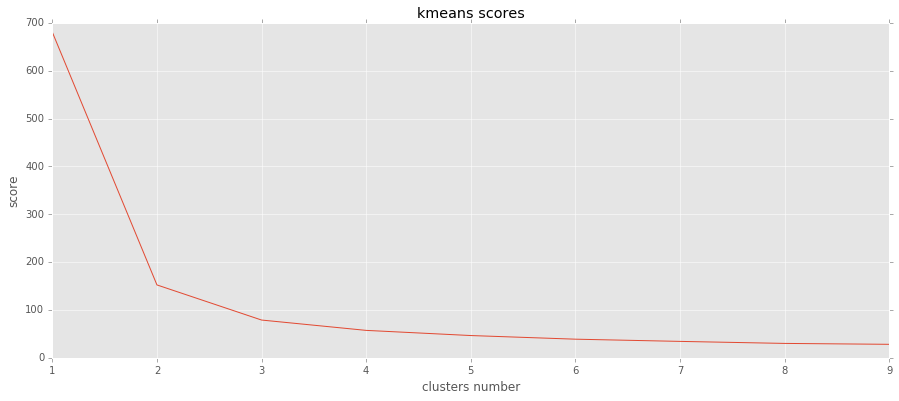

In [31]:
# Plotting evaluated k-means scores
plt.plot(np.arange(1, 10), kmeans_scores)
plt.title('kmeans scores')
plt.xlabel('clusters number')
plt.ylabel('score')
plt.show()

*According to the elbow method, we have to choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. It can be easily noticed that in this case the number of clusters is 3.*

In [49]:
# k-means with 3 clusters
target = load_iris().target
kmeans = KMeans(n_clusters = 3).fit(data)
print(kmeans.labels_)
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [53]:
# percentage of the flowers which didn't match the right cluster
print(1 - accuracy_score(target, kmeans.labels_))

0.106666666667


# 2 Hierarchical clustering

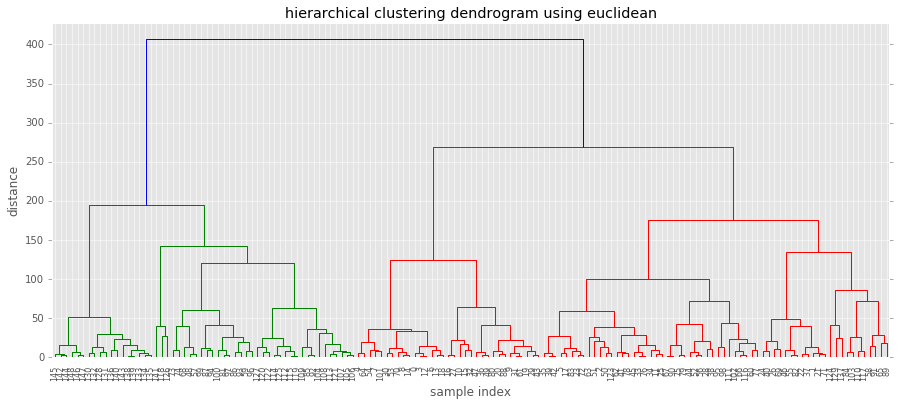

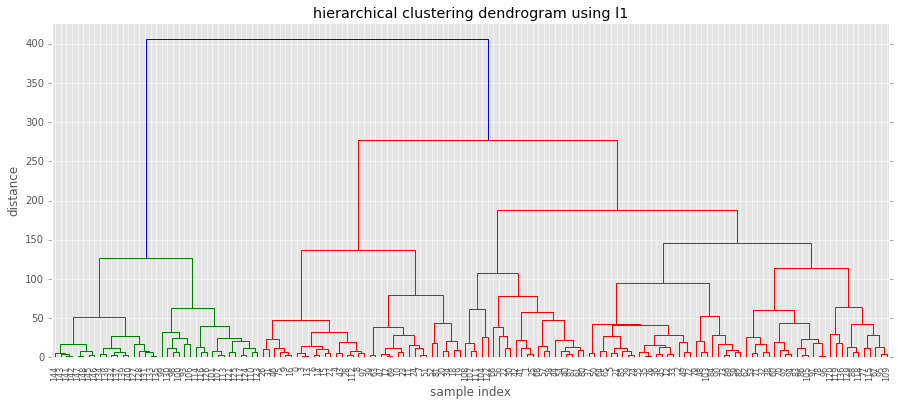

In [78]:
# We're going to work with euclidean and l1 metric for agglomerative clustering
for metric in ["euclidean", "l1"]:
    hierarchical_clustering = AgglomerativeClustering(n_clusters=3, affinity=metric,
                                                 linkage="complete").fit(data)
    Z = linkage(hierarchical_clustering.children_, "complete")
    dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
    plt.title("hierarchical clustering dendrogram using %s" % metric)
    plt.xlabel("sample index")
    plt.ylabel("distance")
    plt.show()

*These dendragrams are very similar, but I think that l1 metric is better - we can see that objects in green cluster have a less pairwise distance than in euclidean metric. The maximum distances of other two clusters seem to be equal in both cases.*

# 3 PCA again

In [86]:
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data)

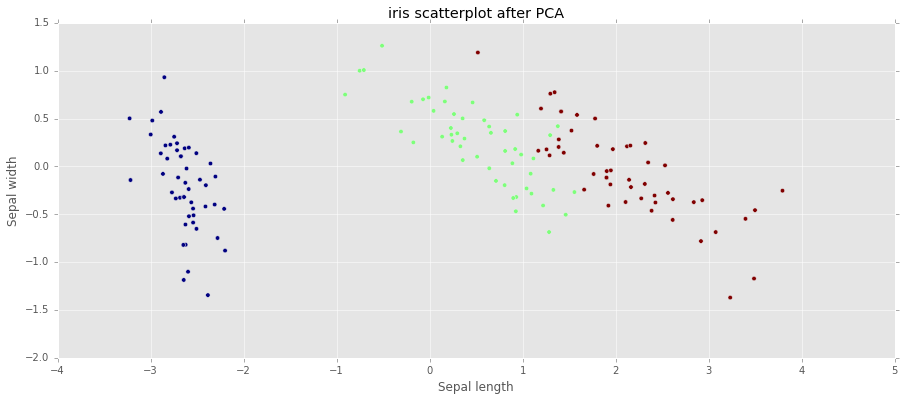

In [102]:
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=target)
plt.title("iris scatterplot after PCA")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()